<a href="https://colab.research.google.com/github/integer-class/machine-learning/blob/main/AL_AZHAR_RRF/jobsheet_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💻Lab Work 1

Iris Classification Using Perceptron

## Description

In this lab work, you are required to perform the classification of iris flowers using a Perceptron model. You can use the iris dataset from the previous practical exercise. To enhance your understanding of the Perceptron model, in this practical exercise, you will create a Perceptron model without using any libraries.

## Step 1 - Import Library

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2 - Load and Visualize The Dataset

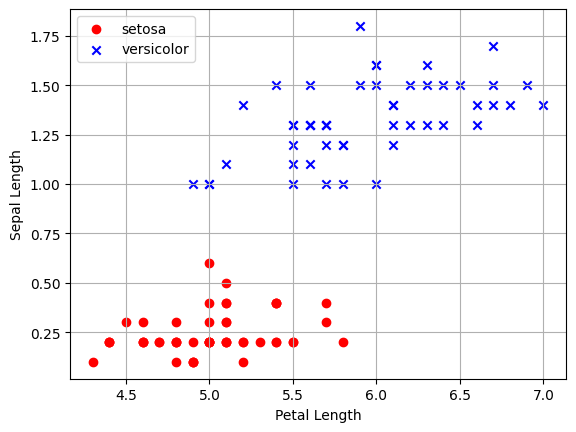

In [21]:
df = pd.read_csv('Iris.csv', header=None)


df[1] = pd.to_numeric(df[1], errors='coerce')  # Sepal Length
df[4] = pd.to_numeric(df[4], errors='coerce')  # Petal Length

df = df.dropna(subset=[1, 4])

setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']
virginica = df[df[5] == 'Iris-virginica']

a, b = 1, 4
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Step 3 - Create Perceptron Class

In this step, we will create perceptron manually though perceptron class.

In [22]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Step 4 - Slice The Dataset and Label Encoding

In [23]:
y = df.iloc[0:100, 5].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [1, 4]].values # slice data latih

## Step 5 - Fit The Model

In [24]:
X = X.astype(float)  # Ensure X is of type float
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

## Step 6 - Visualize The Loss / Error Value

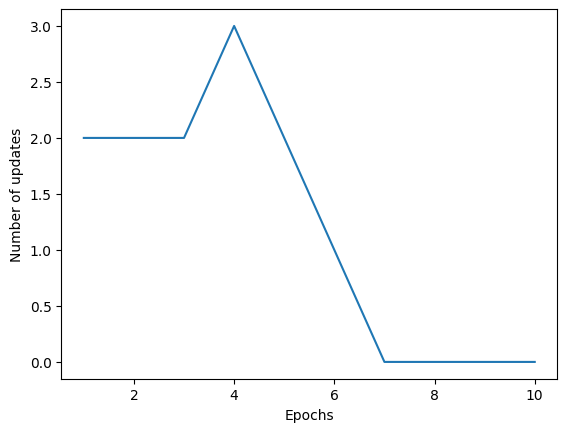

In [25]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## Step 7 - Visualize The Decision Boundary

In [26]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

# 📰Lab Work 2

News Classification Using Perceptron

## Description

In this case, you will perform news classification based on three categories: Sport Hockey, Sport Baseball, and Automotive. The classification process will utilize a Perceptron model. Moreover, you will use scikit-learn library to build perceptron model.

## Step 1 - Import Library

In [27]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

## Step 2 - Select The Labels and Split The Dataset

In [28]:
# Select only 3 labels
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']

# Fetch train dataset
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# Fetch test dataset
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

## Step 3 - Feature Extraction and Model Fitting

In [29]:
# In this case, we will employ TFIDF Vectorizer as a feature
# Initiate the object
vectorizer = TfidfVectorizer()

# Fit the feature
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit the model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediction
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



## Short Explanation

The dataset used in the above code is the 20newsgroup dataset, which consists of approximately 20,000 documents. Scikit-learn even provides functions that make it easy to download and read dataset collections using sklearn.datasets. In the code above, the Perceptron is capable of performing multi-class classification, and the strategy used is one-versus-all for training on each class in the training data. Text documents require feature extraction, one of which is the use of TF-IDF weights. In the above code, a TF-IDF vectorizer is used for this purpose.

# ❌Lab Work 3

XOR Logic Using Multi-Layer Perceptron (MLP)

## Description

In this simple case, you will use a Multi-Layer Perceptron (MLP) to obtain binary values operated with XOR logic. It's important to remember that XOR is different from OR; XOR will only be true if one of the values is true, not both or none at all.

## Step 1 - Import Library

In [30]:
from sklearn.neural_network import MLPClassifier

## Step 2 - Create Data for XOR Logic

In [31]:
y = [0, 1, 1, 0] # labels
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

## Step 3 - Fit The Model

In [32]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

## Step 4 - Do a Prediction

In [33]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# ⛓️Lab Work 4

Churn Customer Prediction Using ANN

## Description

In this lab session, you are required to create an Artificial Neural Network (ANN) model to classify whether a customer is likely to leave your company or not. The popular term for this phenomenon is referred to as 'churn.' A high churn rate can have unfavorable consequences for the company.

## Preprocessing

### Step 1 - Import Library

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Step 2 - Load Data

In [35]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [36]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


### Step 3 - Encode The Categorical Data

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [40]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Step 4 - Encode "Geography" or Nation By Using One-Hot Encoder

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [41]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Step 5 - Split The Data

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Step 6 - Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Create an ANN Model

### Step 1 - Initiate ANN Object

In [44]:
ann = tf.keras.models.Sequential()

### Step 2 - Create Input Layer and First Hidden Layer

In [45]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Step 3 - Create Second Hidden Layer

In [46]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Step 4 - Create Output Layer

In [47]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Step 5 - Compile The ANN Model

In [48]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

If you put it together, the cretation of ANN model using tensorflow will looks like this,

In [49]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training The Model

### Step 1 - Fitting

In [52]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8645 - loss: 0.3345
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8694 - loss: 0.3337
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8661 - loss: 0.3281
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8645 - loss: 0.3325
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8625 - loss: 0.3405
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8639 - loss: 0.3347
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8587 - loss: 0.3383
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8665 - loss: 0.3323
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8569 - loss: 0.3444
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8662 - loss: 0.3308
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8645 - loss: 0.3378
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## Create Prediction Data

In [53]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[False]]


## Prediction Using Testing Data

In [54]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Check The Model Accuraction and Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1519   76]
 [ 198  207]]


0.863

# 📔Lab Assignment

Perform classification on the MNIST dataset using an Artificial Neural Network (ANN) model. You are allowed to explore the following aspects:

  Preprocessing methods.

  Feature selection.

  ANN architecture.

  Activation functions.

The ANN should be implemented using TensorFlow.

This task should be done in groups, and you should explain the results you obtain, including:

  Accuracy.

  Confusion matrix.

  Model configuration, from preprocessing to ANN architecture.

In [58]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [59]:
# Obtaining and Preparing the MNIST Dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [66]:
# Data Pre-Processing


# Data normalization: Change the range [0, 255] to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images: Converts 2D (28x28) images to 1D (784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [61]:
# Feature Selection


pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Building the ANN Model
model = keras.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train_pca.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
# Building the ANN Model


model = keras.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train_pca.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Model compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [63]:
# Train the Model

history = model.fit(x_train_pca, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8322 - loss: 0.5738 - val_accuracy: 0.9577 - val_loss: 0.1419
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9631 - loss: 0.1213 - val_accuracy: 0.9690 - val_loss: 0.1102
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9747 - loss: 0.0811 - val_accuracy: 0.9713 - val_loss: 0.0928
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9816 - loss: 0.0602 - val_accuracy: 0.9735 - val_loss: 0.0878
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9850 - loss: 0.0476 - val_accuracy: 0.9753 - val_loss: 0.0885
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9877 - loss: 0.0394 - val_accuracy: 0.9732 - val_loss: 0.0972
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9887 - loss: 0.0342 - val_accuracy: 0.9762 - val_loss: 0.0878
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9919 - loss: 0.0252 - 

In [64]:
# Evaluate the Model

test_loss, test_accuracy = model.evaluate(x_test_pca, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9698 - loss: 0.1029
Test accuracy: 0.9758


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


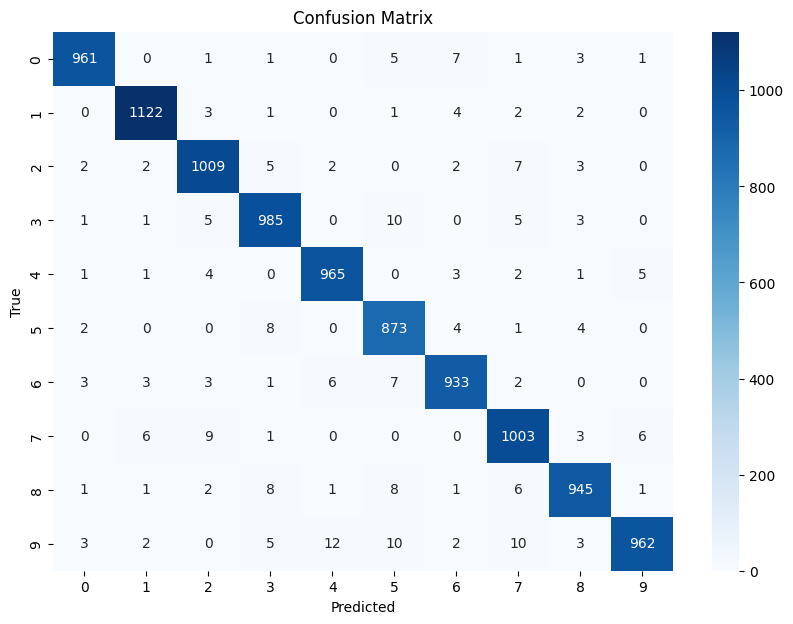

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.98      0.97       892
           6       0.98      0.97      0.97       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [65]:
# Confusion Matrix and Classification Report


y_pred = model.predict(x_test_pca)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_classes))